# Homework 5 – Power and Geography
### "Does access to water resources result in higher GDP?" and other queries about the nature of geography
#### By Chau Tsz Kin & Lars Magne Tungland


# Introduction
We are making a study about the connection between physical and human geography on the macro scale with economic development. 

Economic development will be measured based primarily on GDP per capita, secondarily on factors like inflation and sector makeup of employees.
Using the Mondial database we can compare access to water resources like access to the sea, lakes, rivers and estuaries on a country level. We also have data on GDP (Gross Domestic Product), inflation and distribution of commercial activity between the primary, secondary(manufacturing) and tertiary (services) industry sectors, which can be used to indicate the economic development of countries.  Mondial also shows which countries are in contact with the opposite of a body of water- deserts. We will use these data to examine whether there is a connection between access to different bodies of water and the economic development of countries.
As the Mondial database also contains data some on human geography, we will use these to examine if there is a connection between these factors, like the diversity of language, religions or ethnic groups. 


# Methods and assumptions

Interpretation:
- Assumption: the data is correct
- We tried to audit the continent size given by the dataset against the calculated continent size from the size of the constituent countries
- None of the results are equivalent
- Some is smaller: implies that some area of the continent is unclaimed
- Some is larger: implies that some area have been claimed by more than one countries



# Queries

#### Improting the correct packages and connecting to the database

In [14]:
import mysql.connector
import getpass #not mysql library
import pandas as pd
import pandasql as ps


In [11]:
#On Raphael's computer
#pwd=getpass.getpass()
usrname='test' #change to your username, if you have not created any users yet do so in phpmyadmin
#Tutor123? this is db_tut's password
conn = mysql.connector.connect(host="192.168.56.101", user=usrname, passwd="123", db="Mondial")
#or "localhost" instead of "127.0.0.1"
cursor = conn.cursor(buffered=True)

In [2]:
#Lars MySQL connection
#pwd=getpass.getpass()
usrname='root' #change to your username, if you have not created any users yet do so in phpmyadmin
#Tutor123? this is db_tut's password
conn = mysql.connector.connect(host="127.0.0.1", user=usrname, passwd="", db="mondial")
#or "localhost" instead of "127.0.0.1"
cursor = conn.cursor(buffered=True)

# Checking the data

## Query 1

This query measures the sum of the area of all the countries on a continent against the a given area of the continents.

In [10]:
sql_query = """
SELECT c.Name AS Continent, c.Area AS Area_given, cs_by_agg.Area_by_sum , 
if(Area_by_sum - Area > 0,"Larger","Smaller") AS Diff_Type,
Area_by_sum - Area AS Diff, cs_by_agg.countries_in_continent
FROM 
(SELECT COUNT(c.Code) AS Country_count, e.Continent, ROUND(SUM(c.Area*e.Percentage/100)) AS Area_by_sum,
GROUP_CONCAT(c.Name) AS countries_in_continent 
FROM country AS c, encompasses AS e 
WHERE c.Code = e.Country GROUP BY e.Continent) AS cs_by_agg,
continent AS c
WHERE cs_by_agg.continent = c.Name
"""
df = pd.read_sql(sql_query, conn)
df

,Continent,Area_given,Area_by_sum,Diff_Type,Diff,countries_in_continent
0,Africa,30254700.0,30255303.0,Larger,595.0,"Djibouti,Algeria,Kenya,Tanzania,Uganda,Eritrea..."
1,America,39872000.0,42074504.0,Larger,2202504.0,"Dominican Republic,Ecuador,El Salvador,Falklan..."
2,Asia,45095300.0,44944462.0,Smaller,-150830.0,"Egypt,Gaza Strip,Georgia,Hong Kong,Israel,Indi..."
3,Australia/Oceania,8503470.0,8896673.0,Larger,393199.0,"Fiji,French Polynesia,Micronesia,Guam,Saint He..."
4,Europe,9562490.0,9416125.0,Smaller,-146363.0,"Denmark,Spain,Estonia,France,Faroe Islands,Lie..."


## Query 2

This query measures the sum of the area of all the countries on a continent against the a given area of the continents. 

In [18]:
sql_query = """
SELECT COUNT(c.Code) AS Country_count, e.Continent, ROUND(SUM(c.Area*e.Percentage/100)) AS Area_by_sum,
GROUP_CONCAT(c.Name) AS countries_in_continent 
FROM country AS c, encompasses AS e 
WHERE c.Code = e.Country GROUP BY e.Continent
"""

df = pd.read_sql(sql_query, conn)
df

,Country_count,Continent,Area_by_sum,countries_in_continent
0,55,Africa,30255303.0,"Djibouti,Algeria,Kenya,Tanzania,Uganda,Eritrea..."
1,52,America,42074504.0,"Dominican Republic,Ecuador,El Salvador,Falklan..."
2,53,Asia,44944462.0,"Egypt,Gaza Strip,Georgia,Hong Kong,Israel,Indi..."
3,29,Australia/Oceania,8896673.0,"Fiji,French Polynesia,Micronesia,Guam,Saint He..."
4,53,Europe,9416125.0,"Denmark,Spain,Estonia,France,Faroe Islands,Lie..."


We observe a discrepancies on all the five continents.
This could mean severral things.
* Some of the land is unclaimed
* Border conflicts 
* Overseas territories on other continents counted as part of the territory of the mother country

# Queries measuring human and political geography

## Query 3

This query counts and sorts the number of ethnic groups by country. Top 10 only.

In [36]:
sql_query = """
select *, count(*) as "count", group_concat(eg.name) as "ethnic groups"
                from ethnicGroup eg 
                inner join country c on c.code = eg.country 
                group by eg.country 
                order by count(*) desc
                limit 10
"""

pd.read_sql(sql_query, conn)

,Country,Name,Percentage,Name,Code,Capital,Province,Area,Population,count,ethnic groups
0,EAU,Lugbara,4.0,Uganda,EAU,Kampala,Uganda,236040.0,20158176,12,"Lugbara,Langi,Arab,Baganda,Acholi,Karamojong,B..."
1,EAK,Luhya,14.0,Kenya,EAK,Nairobi,Nairobi,582650.0,28176686,8,"Luhya,Luo,Kikuyu,Meru,Arab,Kalenjin,Kamba,Kisii"
2,IR,Lur,2.0,Iran,IR,Tehran,Tehran,1648000.0,66094264,8,"Lur,Kurd,Azerbaijani,Gilaki Mazandarani,Turkme..."
3,SK,Slovak,85.7,Slovakia,SK,Bratislava,Slovakia,48845.0,5374362,8,"Slovak,German,Polish,Ruthenian,Czech,Ukrainian..."
4,CAM,Cameroon Highlanders,31.0,Cameroon,CAM,Yaounde,Centre,475440.0,14261557,7,"Cameroon Highlanders,Eastern Nigritic,Kirdi,Fu..."
5,ETH,Sidamo,9.0,Ethiopia,ETH,Addis Ababa,Ethiopia,1127130.0,57171662,7,"Sidamo,Gurage,Shankella,Somali,Oromo,Afar,Amha..."
6,MYA,Rakhine,4.0,Myanmar,MYA,Rangoon,Yangon,678500.0,45975625,7,"Rakhine,Mon,Indian,Shan,Karen,Chinese,Burman"
7,R,Russian,81.5,Russia,R,Moscow,Moskva,17075200.0,148178487,7,"Russian,Ukrainian,Moldavian,Byelorussian,Tatar..."
8,SN,Fulani,17.0,Senegal,SN,Dakar,Dakar,196190.0,9092749,7,"Fulani,Wolof,Toucouleur,Diola,European Lebanes..."
9,BG,Armenian,0.3,Bulgaria,BG,Sofia,Bulgaria,110910.0,8612757,6,"Armenian,Roma,Macedonian,Bulgarian,Russian,Turk"


## Query 4

This query shows the number of languages by country. Top ten.

In [13]:
sql_query = """select c.name, count(l.name) as 'languages', group_concat(l.name) as 'language names'
from language l 
inner join country c on c.code = l.country 
group by l.country order by count(*) desc
limit 10"""

pd.read_sql(sql_query, conn)

,name,languages,language names
0,Pakistan,8,"Siraiki,Sindhi,Brahui,Balochi,Hindko,Urdu,Punj..."
1,Iran,7,"Turkic,Balochi,Kurdish,Luri,Turkish,Persian,Ar..."
2,Netherlands Antilles,5,"Creole,Spanish,Papiamento,Dutch,English"
3,Northern Mariana Islands,5,"Phillipine Languages,English,Chamorro,Other Pa..."
4,Switzerland,4,"French,German,Romansch,Italian"
5,Georgia,4,"Georgian,Russian,Azeri,Armenian"
6,Macedonia,4,"Macedonian,Turkish,Albanian,Serbian"
7,Montenegro,4,"Albanian,Serbian,Montenegrin,Bosnian"
8,Serbia,4,"Hungarian,Serbian,Roma,Bosnian"
9,Afghanistan,3,"Pashtu,Afghan Persian,Turkic"


possible to make a query finding out how many countries->continent a language is spoken -> geo diversity
->origin countries->access to water?

This list shows that the data is not complete. For example, according to Wikipedia, the country of South Africa has 11 official languages, which is not reflected in this database.

Source: https://en.wikipedia.org/wiki/South_Africa

## Query 5

In [30]:
EIU = pd.read_csv("EIU_dataset.csv")
EIU.head(3)

,Name,Score,Type
0,Norway,9.87,Full democracy
1,Iceland,9.58,Full democracy
2,Sweden,9.39,Full democracy


In [33]:
# This query shows countries by type of governments
s = """
SELECT p.Country, p.Independence, p.Dependent, p.Government, c.Name#, Group_concat(c.Name), COUNT(Government)
FROM `politics` p
inner join country c
on p.Country = c.Code
where Government REGEXP BINARY '(democra.*|parliament.*|constitution.*)'
#GROUP BY Government
#ORDER BY `COUNT(Government)` DESC 
"""
pd.set_option('display.max_rows', 150)
mondial = pd.read_sql(s, conn)
EIU = pd.read_csv("EIU_dataset.csv")
EIU.head(3)
mondial
df = pd.merge(mondial, EIU, on = 'Name', how = 'inner')
df.sort_values('Score', ascending = False)

,Country,Independence,Dependent,Government,Name,Score,Type
31,N,1905-10-26 00:00:00,None,constitutional monarchy,Norway,9.87,Full democracy
41,S,None,None,constitutional monarchy,Sweden,9.39,Full democracy
34,NZ,1907-09-26 00:00:00,None,parliamentary democracy,New Zealand,9.26,Full democracy
11,DK,None,None,constitutional monarchy,Denmark,9.22,Full democracy
8,CDN,1867-07-01 00:00:00,None,confederation with parliamentary democracy,Canada,9.15,Full democracy
2,AUS,1901-01-01 00:00:00,None,federal parliamentary state,Australia,9.09,Full democracy
33,NL,1579-01-01 00:00:00,None,constitutional monarchy,Netherlands,8.89,Full democracy
23,L,None,None,constitutional monarchy,Luxembourg,8.81,Full democracy
13,GB,1801-01-01 00:00:00,None,constitutional monarchy,United Kingdom,8.53,Full democracy
29,MS,1968-03-12 00:00:00,None,parliamentary democracy,Mauritius,8.22,Full democracy


In [42]:
# This query shows countries by type of governments
s = """
SELECT *, COUNT(Government) FROM `politics` 
GROUP BY Government 
ORDER BY `COUNT(Government)` DESC
"""
pd.set_option('display.max_rows', 150)
pd.read_sql(s, conn)

,Country,Independence,Dependent,Government,COUNT(Government)
0,ARM,1918-05-28 00:00:00,None,republic,86
1,AG,1981-11-01 00:00:00,None,parliamentary democracy,20
2,B,1830-10-04 00:00:00,None,constitutional monarchy,15
3,AXA,None,GB,British Overseas Territories,9
4,A,1918-11-12 00:00:00,None,federal republic,7
5,C,1902-05-20 00:00:00,None,Communist state,5
6,AL,1912-11-28 00:00:00,None,emerging democracy,5
7,BHT,1949-08-08 00:00:00,None,monarchy,4
8,FGU,None,F,overseas department of France,4
9,FSM,1986-11-03 00:00:00,None,constitutional government in free association ...,3


We observe that there schema for government types is not very efficient.

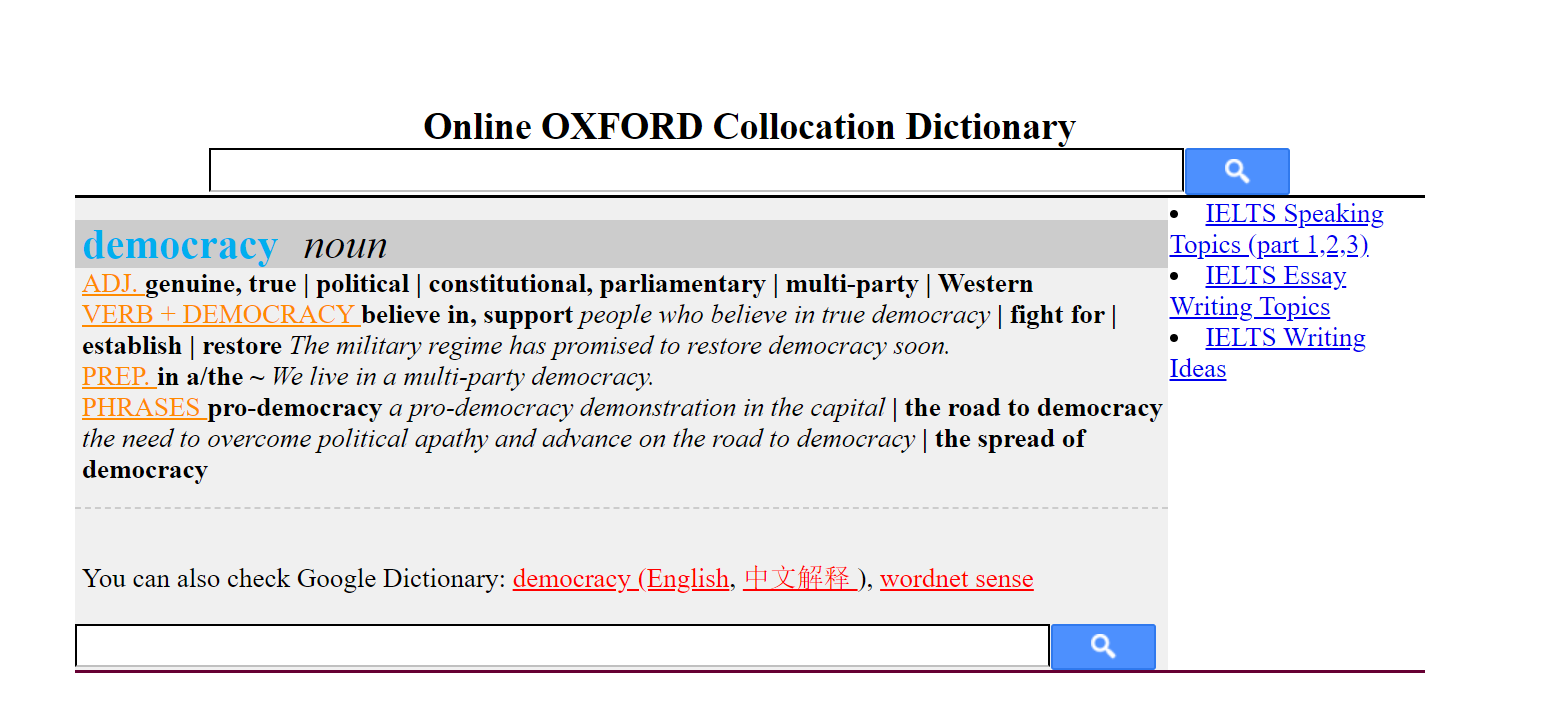

## Queries on economic development

In [22]:
#GDP, pop, GDP per capita by continent
q = """
SELECT *, round(Total_GDP/Total_population) AS GDP_per_capita
FROM
(SELECT e2.Continent, ROUND(sum(e.GDP* 1000000 * e2.Percentage/100)) AS Total_GDP,
ROUND(sum(c.Population * e2.Percentage/100)) AS Total_population 
FROM country c, economy e, encompasses e2
WHERE
c.Code = e.Country AND
e.Country = e2.Country
GROUP by e2.Continent) AS q
"""
pd.read_sql(q, conn)

,Continent,Total_GDP,Total_population,GDP_per_capita
0,Africa,1.167957e+12,7.248037e+08,1611.0
1,America,1.090643e+13,7.842565e+08,13907.0
2,Asia,1.321091e+13,3.580960e+09,3689.0
3,Australia/Oceania,6.432144e+11,7.108820e+07,9048.0
4,Europe,8.173433e+12,6.133404e+08,13326.0


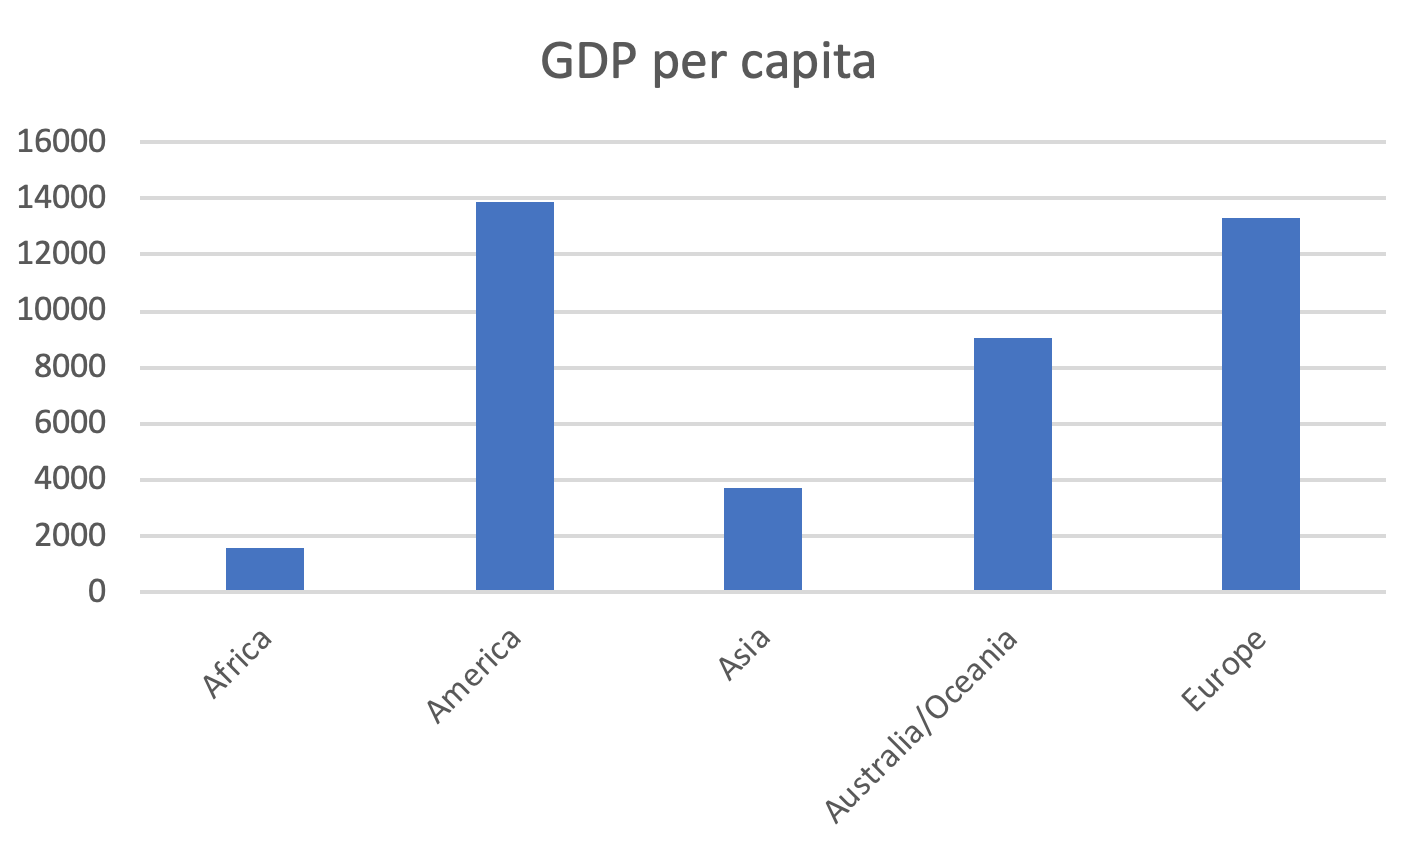

## Queries on rivers

In [61]:
s = """(select c.name, e.gdp, 'with river' as type from country c
left join geo_river gr on c.code = gr.country
inner join economy e on c.code = e.country
where gr.river is not null group by c.code) 
union 
(select c.name, e.gdp, 'no river' as type from country c 
left join geo_river gr on c.code = gr.country 
inner join economy e on c.code = e.country 
where gr.river is null group by c.code)"""

pd.set_option('display.max_rows', 250)
pd.read_sql(s, conn)


#This shows countries with and without rivers

,name,gdp,type
0,Austria,152000.00,with river
1,Afghanistan,12800.00,with river
2,Albania,4100.00,with river
3,Angola,7400.00,with river
4,Australia,405400.00,with river
5,Azerbaijan,11500.00,with river
6,Belgium,197000.00,with river
7,Bangladesh,144500.00,with river
8,Burkina Faso,7400.00,with river
9,Bulgaria,43200.00,with river


In [45]:
s = """SELECT *, ROUND(gdp*1000000/c.Population) AS "GDP per capita" FROM `country` c, economy e
WHERE c.code = e.Country  
ORDER BY `GDP per capita`  DESC"""

pd.read_sql(s, conn)

,Name,Code,Capital,Province,Area,Population,Country,GDP,Agriculture,Service,Industry,Inflation,GDP per capita
0,Macau,MACX,Macau,Macau,16.00,496837,MACX,220400.00,0.1,2.8,97.1,6.20,443606.0
1,Bermuda,BERM,Hamilton,Bermuda,53.30,67837,BERM,4500.00,1.0,10.0,89.0,2.80,66335.0
2,Hong Kong,HONX,Hong Kong,Hong Kong,1092.00,7055071,HONX,307600.00,0.0,7.9,92.0,2.10,43600.0
3,Cayman Islands,CAYM,George Town,Cayman Islands,262.00,49035,CAYM,1939.00,1.4,3.2,95.4,4.40,39543.0
4,Falkland Islands,FALK,Stanley,Falkland Islands,12173.00,3140,FALK,105.10,NaN,NaN,NaN,NaN,33471.0
5,United States,USA,Washington,Distr. Columbia,9372610.00,266476278,USA,7247700.00,2.0,23.0,75.0,2.50,27198.0
6,Monaco,MC,Monaco,Monaco,1.90,31719,MC,788.00,NaN,NaN,NaN,NaN,24843.0
7,Norway,N,Oslo,Oslo,324220.00,4383807,N,106200.00,2.9,34.7,62.4,2.50,24226.0
8,Canada,CDN,Ottawa,Ontario,9976140.00,28820671,CDN,694000.00,2.0,26.0,72.0,2.40,24080.0
9,Luxembourg,L,Luxembourg,Luxembourg,2586.00,415870,L,10000.00,1.4,33.7,64.9,3.60,24046.0


In [46]:
s = """(SELECT e.gdp*1000000/c.Population AS "AVG GDP", 'With river' AS TYPE 
FROM country c 
LEFT JOIN (SELECT country, group_concat(river) as river FROM geo_river group by country) gr
ON c.code = gr.country 
INNER JOIN economy e ON c.code = e.country 
WHERE gr.River is NOT NULL
group by TYPE)
UNION
(SELECT ROUND(AVG(e.gdp*1000000/c.Population)), 'no river' AS TYPE 
FROM country c 
LEFT JOIN (SELECT country, group_concat(river) as river FROM geo_river group by country) gr
ON c.code = gr.country 
INNER JOIN economy e ON c.code = e.country 
WHERE gr.River is NULL
group by TYPE)"""

pd.read_sql(s, conn)

,AVG GDP,TYPE
0,18944.955432,With river
1,11981.000000,no river


This shows there is a huge difference in average gdp 

## Queries on Oceans

In [47]:
#Count total numbers of sea each sea merges with and order by the total numbers
#1. union the mergesWith table beacuse the relation between sea1 and sea2 is not reciprocal
#2. verify if union method produces unique relations
#3. Do the agg with the union table
#1:
s = """
Select distinct * FROM
(SELECT sea1, sea2 from mergesWith
UNION
SELECT sea2 as sea1, sea1 as sea2 from mergesWith) AS mergesWith_union
"""
pd.set_option('display.max_rows', 1000)
df = pd.read_sql(s, conn)
df

,sea1,sea2
0,Andaman Sea,Gulf of Bengal
1,Andaman Sea,Indian Ocean
2,Andaman Sea,Malakka Strait
3,Arabian Sea,Gulf of Aden
4,Arabian Sea,Gulf of Oman
5,Arabian Sea,Indian Ocean
6,Arctic Ocean,Atlantic Ocean
7,Arctic Ocean,Barents Sea
8,Arctic Ocean,Bering Sea
9,Arctic Ocean,Norwegian Sea


In [48]:
# This query shows which oceans and seas that connects with each other and counts the connections.
# This is a recursive query.
s = """
Select sea1,group_concat(Sea2) , COUNT(Sea2) AS Seas_Merged_With FROM
(SELECT sea1, sea2 from mergesWith
UNION
SELECT sea2 as sea1, sea1 as sea2 from mergesWith) AS united
GROUP BY Sea1
ORDER BY Seas_Merged_With DESC
"""
df = pd.read_sql(s, conn)
df

,sea1,group_concat(Sea2),Seas_Merged_With
0,Atlantic Ocean,"Gulf of Mexico,Arctic Ocean,Indian Ocean,Irish...",10
1,Pacific Ocean,"Sea of Japan,Sea of Okhotsk,Bering Sea,South C...",10
2,Indian Ocean,"Pacific Ocean,Gulf of Aden,Sunda Sea,Andaman S...",7
3,Arctic Ocean,"Atlantic Ocean,Barents Sea,Bering Sea,Norwegia...",5
4,North Sea,"Atlantic Ocean,Norwegian Sea,Skagerrak,Baltic ...",5
5,South China Sea,"Sunda Sea,Pacific Ocean,Malakka Strait,Sulawes...",5
6,Sunda Sea,"Indian Ocean,Pacific Ocean,Gulf of Bengal,Sout...",5
7,East China Sea,"Sea of Japan,South China Sea,Yellow Sea,Pacifi...",4
8,Norwegian Sea,"Arctic Ocean,Atlantic Ocean,North Sea,Barents Sea",4
9,Sea of Japan,"Sea of Okhotsk,Yellow Sea,East China Sea,Pacif...",4


In [37]:
# This query shows which countries are landlocked or not.

s = """
SELECT c.Name, e.GDP, c.population, round(e.gdp*1000000/c.population) AS GDP_per_capita ,
IF(count(gs.Sea)=0,"landlocked","coastal"), GROUP_concat(DISTINCT gs.Sea), count(DISTINCT gs.Sea) AS sea_count
FROM country c
LEFT JOIN geo_sea gs
ON gs.Country = c.Code
INNER JOIN economy e
on c.Code = e.Country
GROUP BY c.Code
ORDER BY GDP DESC
"""
df = pd.read_sql(s, conn)
df

,Name,GDP,population,GDP_per_capita,"IF(count(gs.Sea)=0,""landlocked"",""coastal"")",GROUP_concat(DISTINCT gs.Sea),sea_count
0,United States,7247700.0,266476278,27198.0,coastal,"Pacific Ocean,Atlantic Ocean,Bering Sea,Gulf o...",5
1,China,3500000.0,1210004956,2893.0,coastal,"Yellow Sea,East China Sea,South China Sea",3
2,Japan,2679200.0,125449703,21357.0,coastal,"Sea of Japan,East China Sea,Pacific Ocean,Sea ...",4
3,Germany,1452200.0,83536115,17384.0,coastal,"North Sea,Baltic Sea",2
4,India,1408700.0,952107694,1480.0,coastal,"Andaman Sea,Arabian Sea,Indian Ocean,Gulf of B...",4
...,...,...,...,...,...,...,...
233,Saint Martin,NaN,29820,NaN,coastal,"Atlantic Ocean,Caribbean Sea",2
234,Svalbard,NaN,2116,NaN,coastal,"Atlantic Ocean,Norwegian Sea,Arctic Ocean",3
235,Holy See,NaN,840,NaN,landlocked,None,0
236,Western Sahara,NaN,222631,NaN,coastal,Atlantic Ocean,1


In [50]:
# This query compares the avarage GDP of costal and landlocked countries.
q = """
SELECT ROUND(AVG(GDP_per_capita)), ROUND(AVG(Inflation)), ROUND(AVG(Agriculture)),ROUND(AVG(Industry)),ROUND(AVG(Service)), type from
(SELECT c.Name, e.GDP, c.population, e.gdp*1000000/c.population AS GDP_per_capita, e.Inflation, e.Agriculture, e.Industry, e.Service, IF(count(gs.Sea)=0,"landlocked","coastal") as type, GROUP_concat(DISTINCT gs.Sea), count(DISTINCT gs.Sea) AS sea_count
FROM country c
LEFT JOIN geo_sea gs
ON gs.Country = c.Code
INNER JOIN economy e
on c.Code = e.Country
GROUP by c.Code) AS q
GROUP BY type
"""
pd.read_sql(q, conn)

,ROUND(AVG(GDP_per_capita)),ROUND(AVG(Inflation)),ROUND(AVG(Agriculture)),ROUND(AVG(Industry)),ROUND(AVG(Service)),type
0,10371.0,13.0,17.0,56.0,28.0,coastal
1,4573.0,28.0,30.0,42.0,27.0,landlocked


An even bigger difference in GDP per capita
Potential query: correlate GDP_per_capita: to Agriculture, Industry and Service sector ratio for each countries / continent / type of government, access to sea, access to river etc.

## Queries on lakes

In [51]:
#This query shows which countries has lakes
# use distinct to remove province[n]
s = """
SELECT gl.Lake, GROUP_CONCAT(DISTINCT gl.Country), l.Area, GROUP_CONCAT(DISTINCT e.Continent) from geo_lake gl, lake l, encompasses e
WHERE gl.Lake = l.Name AND
gl.Country = e.Country
GROUP BY Area DESC
"""
df = pd.read_sql(s, conn)
df

,Lake,GROUP_CONCAT(DISTINCT gl.Country),Area,GROUP_CONCAT(DISTINCT e.Continent)
0,Caspian Sea,"R,IR,TM,KAZ,AZ",386400.000,"Europe,Asia"
1,Lake Superior,"CDN,USA",82103.000,America
2,Lake Victoria,"EAK,EAT,EAU",68870.000,Africa
3,Lake Huron,"CDN,USA",59600.000,America
4,Lake Michigan,USA,57800.000,America
5,Dead Sea,"WEST,IL,JOR",41650.000,Asia
6,Lake Tanganjika,"BI,EAT,Z,ZRE",32893.000,Africa
7,Great Bear Lake,CDN,31792.000,America
8,Ozero Baikal,R,31492.000,"Europe,Asia"
9,Lake Malawi,"EAT,MW,MOC",29600.000,Africa


# Queries on islands and dependencies

In [52]:
#This shows Dependent terretories grouped by Government Systems
q = """
select c2.Name AS Dependent,p.Government,group_concat(c.Name) as Dependencies,COUNT(c.Code) AS count from
politics p
inner join country c
on p.Country = c.Code
inner join country c2
on p.Dependent = c2.Code
WHERE
Dependent is not NULL 
GROUP BY Government
order by count DESC
"""
pd.read_sql(q, conn)

,Dependent,Government,Dependencies,count
0,United Kingdom,British Overseas Territories,"Saint Helena,Turks and Caicos Islands,Montserr...",9
1,France,overseas department of France,"Guadeloupe,French Guiana,Reunion,Martinique",4
2,United Kingdom,British crown dependency,"Man,Jersey,Guernsey",3
3,Australia,territory of Australia,"Norfolk Island,Christmas Island,Cocos Islands",3
4,Denmark,part of the Danish realm,"Greenland,Faroe Islands",2
5,Netherlands,part of the Dutch realm,"Aruba,Netherlands Antilles",2
6,China,special administrative area in China,"Macau,Hong Kong",2
7,France,territorial collectivity of France,"Mayotte,Saint Pierre and Miquelon",2
8,United States,commonwealth associated with the US,Puerto Rico,1
9,United States,commonwealth in political union with the US,Northern Mariana Islands,1


This table shows the different types of government for dependent terretories in the Mondial database.
We see that the most common is the 'British Overseas Terretories' with 9. 

In [53]:
#This shows Dependent terretories grouped by dependent.
q = """
select c2.Name AS Dependent,p.Government,group_concat(c.Name) as Dependencies,COUNT(c.Code) AS count from
politics p
inner join country c
on p.Country = c.Code
inner join country c2
on p.Dependent = c2.Code
WHERE
Dependent is not NULL 
GROUP BY Dependent
order by count DESC
"""
pd.read_sql(q, conn)

,Dependent,Government,Dependencies,count
0,United Kingdom,British Overseas Territories,"Montserrat,Turks and Caicos Islands,Pitcairn I...",13
1,France,overseas department of France,"Reunion,Guadeloupe,Wallis and Futuna,Martiniqu...",10
2,United States,commonwealth associated with the US,"Puerto Rico,Guam,Northern Mariana Islands,Amer...",4
3,Australia,territory of Australia,"Christmas Island,Norfolk Island,Cocos Islands",3
4,Denmark,part of the Danish realm,"Greenland,Faroe Islands",2
5,Netherlands,part of the Dutch realm,"Netherlands Antilles,Aruba",2
6,China,special administrative area in China,"Macau,Hong Kong",2
7,Norway,territory of Norway administered by the Minist...,Svalbard,1
8,New Zealand,self governing parliamentary government in fre...,Cook Islands,1


This shows that the countries with the most dependent terretories are the former imperial powers of the UK and France.

In [54]:
# We wanted to find out what countries are composed of islands
# We start out with this table, which compares the area of the countries with the area of the islands they inhabit.
q = """
SELECT c.Code, c.Name AS Country,c.Area AS Country_Area, ROUND(sum(i.Area)) AS Total_Island_Area, ROUND((sum(i.Area)/c.Area)*100) AS Island_Percentage, GROUP_concat(i.Name) AS Islands, Group_concat(i.Area) AS Island_Area from
country c
inner join
(select DISTINCT island, country from geo_island) g
on c.Code = g.Country
inner join
island i
on g.Island = i.Name
GROUP by c.Code
order by Island_Percentage DESC
"""
pd.set_option('display.max_rows', 150)
pd.read_sql(q, conn)

,Code,Country,Country_Area,Total_Island_Area,Island_Percentage,Islands,Island_Area
0,BRU,Brunei,5770.0,743122.0,12879.0,Borneo,743122
1,RH,Haiti,27750.0,76192.0,275.0,Hispaniola,76192
2,TL,Timor-Leste,15007.0,33850.0,226.0,Timor,33850
3,MAL,Malaysia,329750.0,743122.0,225.0,Borneo,743122
4,PNG,Papua New Guinea,461690.0,794800.0,172.0,"Bougainville,New Guinea","8800,786000"
5,SMAR,Saint Martin,54.0,87.0,161.0,St. Martin,87
6,DOM,Dominican Republic,48730.0,76192.0,156.0,Hispaniola,76192
7,GB,United Kingdom,244820.0,323855.0,132.0,"Shetland Mainland,Mull,North Uist,Hoy,Jura,Bis...","970,910,303,143,367,91,104,320,381,492,229850,..."
8,RI,Indonesia,1919440.0,2408656.0,125.0,"Lombok,Bali,Sumatra,Ceram,New Guinea,Bangka,Su...","4725,5561,473000,17100,786000,11942,15448,1266..."
9,IRL,Ireland,70280.0,84421.0,120.0,Ireland,84421


Island percentage is generated from dividing Island area by country area. Island area is generated by summing all the island regions in each country.

IA = (I1 + I2 + I3 + ... + Ii)

IP = (IA/CA) * 100

Some countries have a percentage higher than 100 %. We inspect the data and infer that this means they share an island with another countries.
For example, the UK is composed of islands with a total area 132 % of the stated area of the UK itself. This should be explained by the UK having a part of the island of Ireland, shared with the Republic of Ireland
A more extreme example:
The country of Brunei occupies island(s) 12879 % of the country's own size. This is explained by Brunai being a small country on the world's third largest island, Borneo

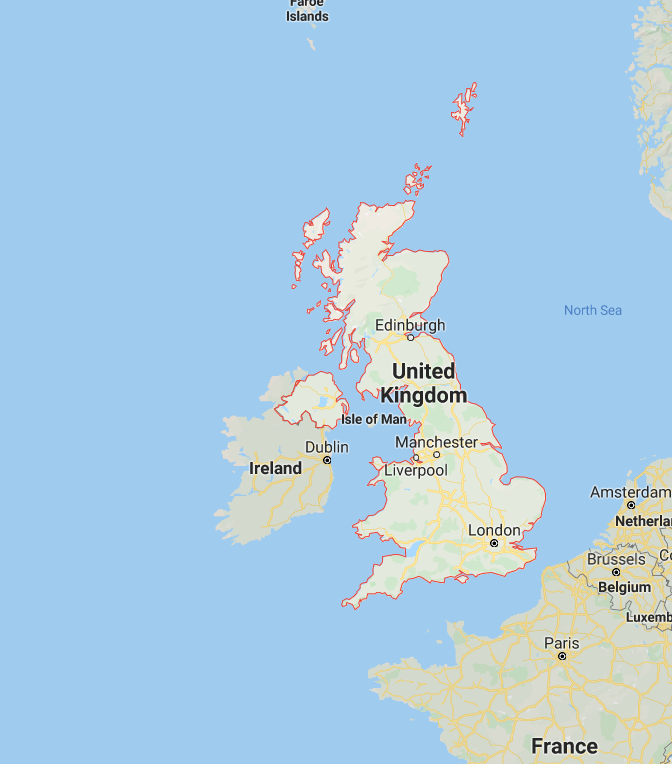

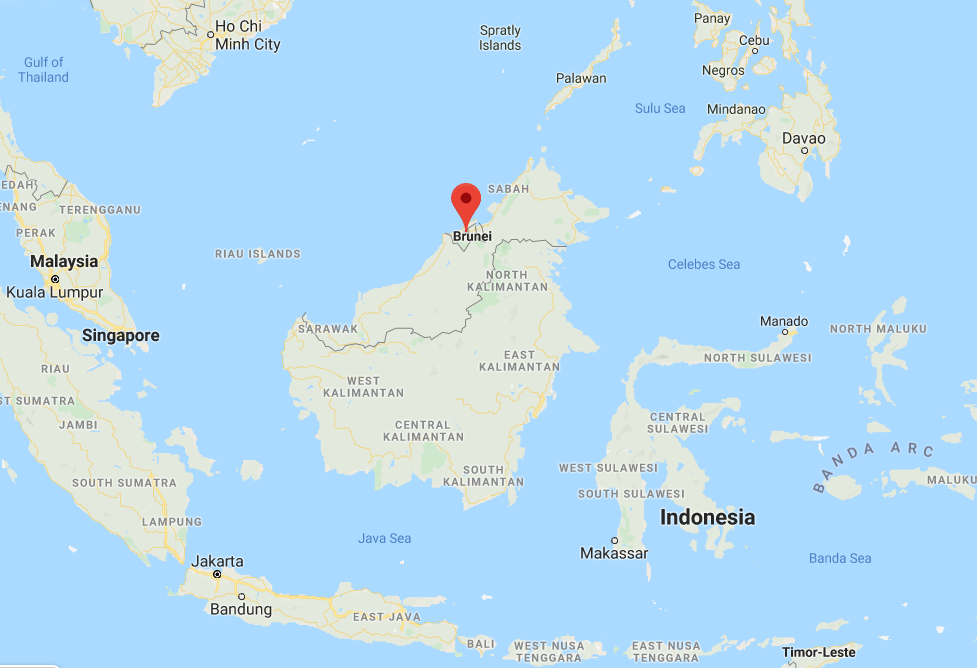

In [55]:
# This table shows the dependent terretories with the island percentage.
q = """
select c2.Name AS Dependent,p.Government,c.Name as Dependencies, r.Island_Percentage,r.Islands from
politics p
inner join country c
on p.Country = c.Code
inner join country c2
on p.Dependent = c2.Code
left join (SELECT c.Code, c.Name AS Country,c.Area AS Country_Area, ROUND(sum(i.Area)) AS Total_Island_Area, ROUND((sum(i.Area)/c.Area)*100) AS Island_Percentage, GROUP_concat(i.Name) AS Islands, Group_concat(i.Area) AS Island_Area from
country c
inner join
(select DISTINCT island, country from geo_island) g
on c.Code = g.Country
inner join
island i
on g.Island = i.Name
GROUP by c.Code
order by Island_Percentage DESC) r
on p.Country = r.Code
WHERE
Dependent is not NULL 
order by Island_Percentage desc
"""
pd.set_option('display.max_rows', 150)
pd.read_sql(q, conn)

,Dependent,Government,Dependencies,Island_Percentage,Islands
0,France,overseas collectivity of France,Saint Martin,161.0,St. Martin
1,Netherlands,part of the Dutch realm,Aruba,100.0,Aruba
2,United Kingdom,British Overseas Territories,Bermuda,100.0,Grand Bermuda
3,United Kingdom,British crown dependency,Guernsey,100.0,Guernsey
4,United Kingdom,British crown dependency,Jersey,100.0,Jersey
5,United Kingdom,British crown dependency,Man,100.0,Isle of Man
6,Denmark,part of the Danish realm,Greenland,100.0,Greenland
7,United States,organized,Guam,100.0,Guam
8,France,overseas department of France,Martinique,100.0,Martinique
9,France,territorial collectivity of France,Mayotte,100.0,Mayotte


We inspect the table

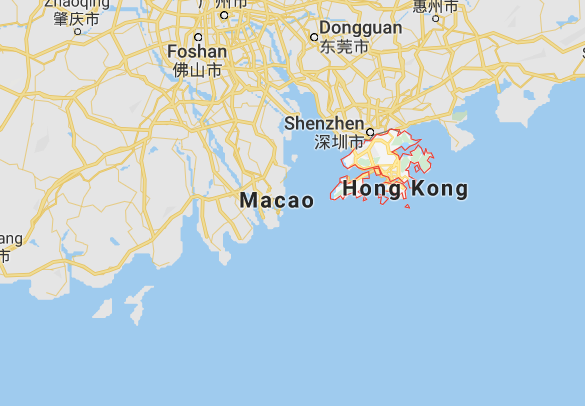

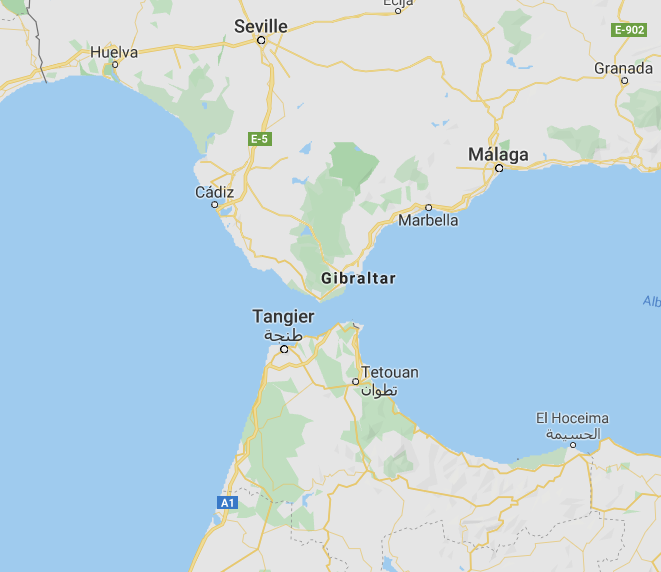

The entries with 'Null' in the island percentage (meaning they have no islands in them in the Mondial) are indeed not islands.
Although part of Hong Kong is an island, this island is not in the database ( we checked).

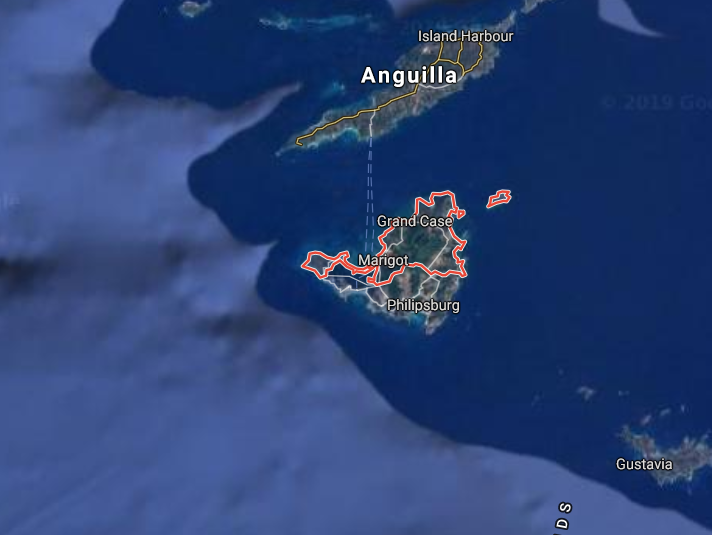

We observe that French St. Martin has a smaller area than the island it is on, explaining its "island percentage" of 161 %

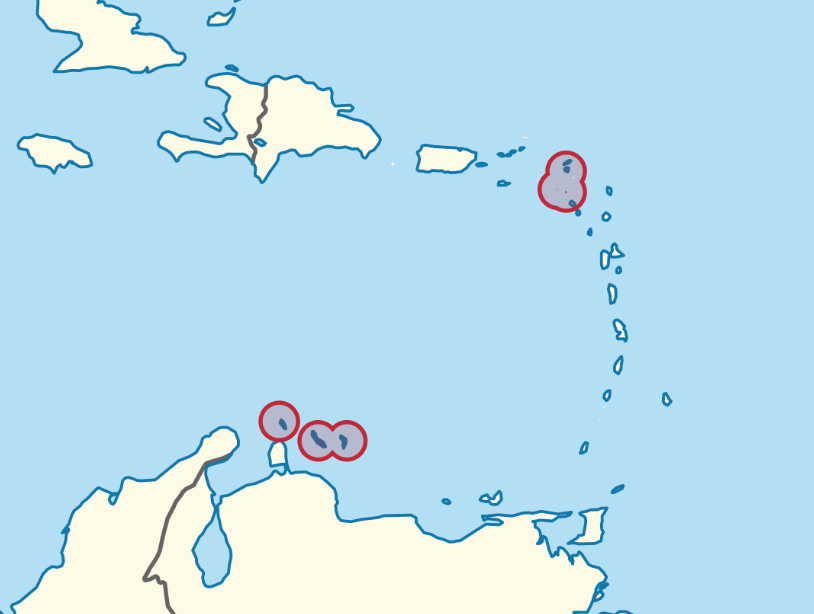

We observe that the entries with "island percentages" smaller than 100 % are composed of archipelagos of various sizes, where not all the islands are in the database.
For example the Dutch Antillies has only 3 islands in the database, one of which is St. Martin which it shares with France. According to wikipedia, the territory is composed of 5 islands.

Source: https://en.wikipedia.org/wiki/Netherlands_Antilles

We see that the territories with a 100 % island percentage are composed of single islands indeed correspond to territories composed of single islands.

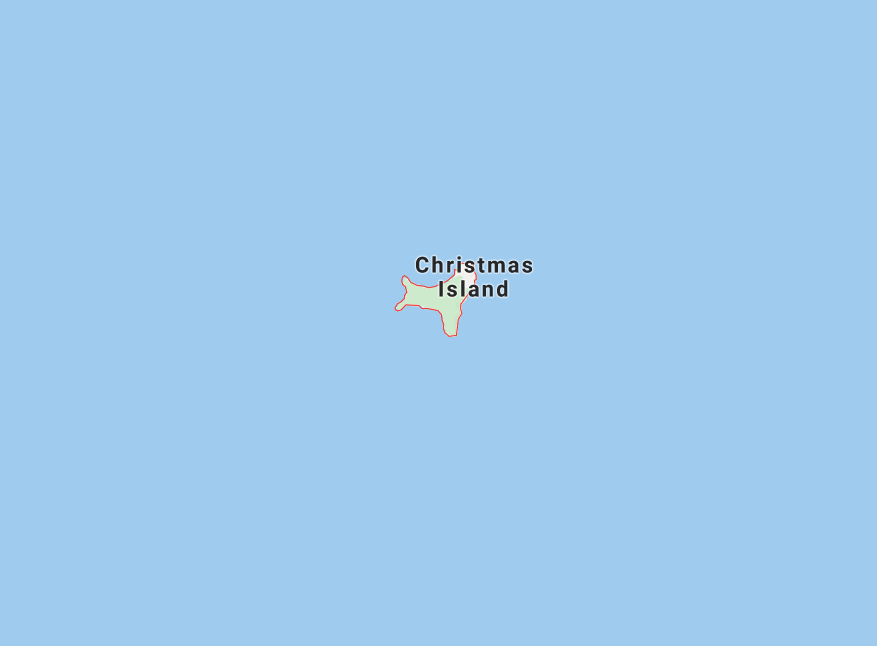

We now feel confindent we can make a table showing which dependencies are islands or not.

In [8]:
q = """
select c2.Name AS Dependent,p.Government,c.Name as Dependencies, r.Island_Percentage, 
if(Island_Percentage = 100, "island",if(Island_Percentage > 100, "part of island",if(Island_Percentage < 100, "archipelago",if(Island_Percentage is NULL, "not island",FALSE)) )) AS "Is_island?",
r.Islands from
politics p
inner join country c
on p.Country = c.Code
inner join country c2
on p.Dependent = c2.Code
left join (SELECT c.Code, c.Name AS Country,c.Area AS Country_Area, ROUND(sum(i.Area)) AS Total_Island_Area, ROUND((sum(i.Area)/c.Area)*100) AS Island_Percentage, GROUP_concat(i.Name) AS Islands, Group_concat(i.Area) AS Island_Area from
country c
inner join
(select DISTINCT island, country from geo_island) g
on c.Code = g.Country
inner join
island i
on g.Island = i.Name
GROUP by c.Code
order by Island_Percentage DESC) r
on p.Country = r.Code
WHERE
Dependent is not NULL 
order by Island_Percentage desc
"""
pd.set_option('display.max_rows', 150)
pd.read_sql(q, conn)

,Dependent,Government,Dependencies,Island_Percentage,Is_island?,Islands
0,France,overseas collectivity of France,Saint Martin,161.0,part of island,St. Martin
1,Netherlands,part of the Dutch realm,Aruba,100.0,island,Aruba
2,United Kingdom,British Overseas Territories,Bermuda,100.0,island,Grand Bermuda
3,United Kingdom,British crown dependency,Guernsey,100.0,island,Guernsey
4,United Kingdom,British crown dependency,Jersey,100.0,island,Jersey
5,United Kingdom,British crown dependency,Man,100.0,island,Isle of Man
6,Denmark,part of the Danish realm,Greenland,100.0,island,Greenland
7,United States,organized,Guam,100.0,island,Guam
8,France,overseas department of France,Martinique,100.0,island,Martinique
9,France,territorial collectivity of France,Mayotte,100.0,island,Mayotte


We use the following tools to illustrate our table:

http://www.dpriver.com/pp/sqlformat.htm Beautifier
https://gudusoft.com/sqlflow/?utm_source=instantSQLFormatterButton&utm_medium=button&utm_campaign=sqlflow_introduce&utm_content=genericIntroduce#/ SQLflow

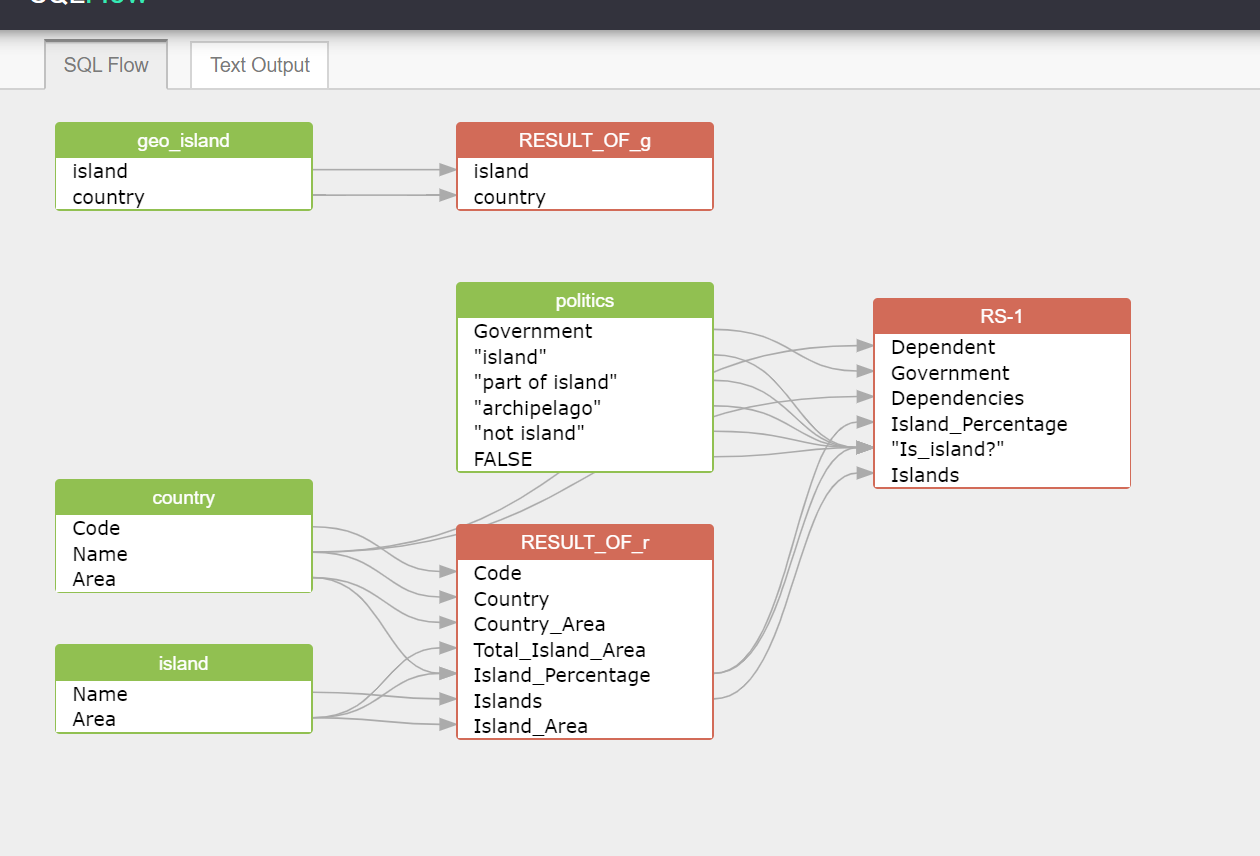

In [4]:
#Our "beautified" code for the island dependencies table:
q = """
SELECT c2.name     AS Dependent, 
       p.government, 
       c.name      AS Dependencies, 
       r.island_percentage, 
       IF(island_percentage = 100, "island", 
       IF(island_percentage > 100, "part of island", 
                                             IF( 
       island_percentage < 100, "archipelago", 
       IF(island_percentage IS NULL, "not island" 
       , FALSE)))) AS "Is_island?", 
       r.islands 
FROM   politics p 
       inner join country c 
               ON p.country = c.code 
       inner join country c2 
               ON p.dependent = c2.code 
       left join (SELECT c.code, 
                         c.name                                AS Country, 
                         c.area                                AS Country_Area, 
                         Round(SUM(i.area))                    AS 
                         Total_Island_Area, 
                         Round(( SUM(i.area) / c.area ) * 100) AS 
                         Island_Percentage, 
                         Group_concat(i.name)                  AS Islands, 
                         Group_concat(i.area)                  AS Island_Area 
                  FROM   country c 
                         inner join (SELECT DISTINCT island, 
                                                     country 
                                     FROM   geo_island) g 
                                 ON c.code = g.country 
                         inner join island i 
                                 ON g.island = i.name 
                  GROUP  BY c.code 
                  ORDER  BY island_percentage DESC) r 
              ON p.country = r.code 
WHERE  dependent IS NOT NULL 
ORDER  BY island_percentage DESC 
"""
pd.set_option('display.max_rows', 150)
pd.read_sql(q, conn)

NameError: name 'conn' is not defined

This classification could possibly be applied to the whole dataset, but from inspecting the data for non-dependant territories we observe that this might be more complicated - see the UK
This means that this classification system is not perfect. The query would have to account for the number of islands in the territory.

# Conclusion
## Criticism of the method and of the database
Criticism: Mondial dataset not complete _ compare languages on South Africa. 
We only study at the country level: but both water access and development have huge discrepancies within individual countries. 
Measuring Economic development by diversity: it would be simplistic to suggest that this relationship alone indicates 

Potential criticism of the use of GDP as an indicator of Economic development?

## (Notes on potential queries)
are rich countries less diverse (language, ethnicity, religion)

Can we look at the percentages of the ethnic groups

Can we measure a connection between type of government and access to the sea? We can for GDP at least. 

* GDP per capita based on which sea they are connected with. 

* Connections with deserts.
* Can we measure the density of International organizations?
* Density of IO headquarters
* Density of cities – to measure urbanisation

* Could we make the queries on ethnic groups and languages show the percentages as well. A query on religions should be added
* Can we make the queries on countries without rivers show which are islands?
* Potential query: correlate GDP_per_capita: to Agriculture, Industry and Service sector ratio for each countries / continent / type of government, access to sea, access to river etc.
